# Исследование объявлений о продаже квартир


# Цель:

Основная цель проекта это научиться определять рыночную стоимость объектов недвижимости.

# Задача:

- Предобработать данные;

- Посчитать и добавить в таблицу метрики квартиры;
    
- Провести исследовательский анализ данных.


# Аббревиатуры:

## Датасет *real_estate_data.csv*:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

# Содержание 



# Шаг 1. 

# Открыть файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
flats = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

При первом просмотре этого файла, можно сразу же увидеть, что отсутствует большое количество данных. В особенности в колонках "высота потолков" и "апартаменты". Надо будет в обязательном порядке запослнить пропуски. Так же есть странные объявления по типу следующих, нет фотографий, но цена очень высокая и стоят такие объвления уже много лет. Надо будет так же решить , что делать с такими объявлениями. К тому же, в файле содержаться не только квартиры в Санкт Петербурге, но и близ лижайших поселков, что сильно повлияет на конечный результат для таких параметров как средняя цена, если ничего с этим не делать. Есть еще много нюансов, не таких критичных, но в любом случае надо будет ими заняться. 

# Шаг 2. 

# Предобработка данных

In [2]:
#Количество пропусков в столбцах
row = flats.columns
for row in flats:
    print(row,flats[row].isnull().sum())


total_images 0
last_price 0
total_area 0
first_day_exposition 0
rooms 0
ceiling_height 9195
floors_total 86
living_area 1903
floor 0
is_apartment 20924
studio 0
open_plan 0
kitchen_area 2278
balcony 11519
locality_name 49
airports_nearest 5542
cityCenters_nearest 5519
parks_around3000 5518
parks_nearest 15620
ponds_around3000 5518
ponds_nearest 14589
days_exposition 3181


In [3]:
#Узнать количество уникальных названий в столбцах
row = flats.columns
for row in flats:
    print(row, flats[row].unique())


total_images [20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]
last_price [13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
total_area [108.    40.4   56.   ...  66.86 133.81  76.75]
first_day_exposition ['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']
rooms [ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
ceiling_height [  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54

In [4]:
#Устранение пропусков
#Балконы
flats["balcony"] = flats["balcony"].fillna(0)
print("balcony_nan:",flats["balcony"].isnull().sum())
print()
#Этажей в доме
flats.dropna(subset = ["floors_total"], inplace = True)
print("floors_total_nan:",flats["floors_total"].isnull().sum())
print()
#Апартаменты
flats["is_apartment"] = flats["is_apartment"].fillna(0)
flats["is_apartment"] = flats["is_apartment"].replace(False, 0)
print("is_apartment_nan:",flats["is_apartment"].isnull().sum())
print()
#Парки в радиусе 3км
flats["parks_around3000"] = flats["parks_around3000"].fillna(0)
print("parks_around3000_nan:",flats["parks_around3000"].isnull().sum())
print()
#Расстояния до ближайшего парка
flats["parks_nearest"] = flats["parks_nearest"].fillna(0)
print("parks_nearest_nan:",flats["parks_nearest"].isnull().sum())
print()
#Число водоёмов в радиусе 3 км
flats["ponds_around3000"] = flats["ponds_around3000"].fillna(0)
print("ponds_around3000_nan:",flats["ponds_around3000"].isnull().sum())
print()
#Расстояние до ближайшего водоёма
flats["ponds_nearest"] = flats["ponds_nearest"].fillna(0)
print("ponds_nearest_nan:",flats["ponds_nearest"].isnull().sum())
print()

balcony_nan: 0

floors_total_nan: 0

is_apartment_nan: 0

parks_around3000_nan: 0

parks_nearest_nan: 0

ponds_around3000_nan: 0

ponds_nearest_nan: 0



In [5]:
#Услажненные пропуски
#Высота потолков
flats.loc[(flats['ceiling_height'] > 11), 'ceiling_height'] = flats.loc[flats['ceiling_height'] > 11, 'ceiling_height'] / 10
print()
#Жилая площадь
flats.loc[(flats['kitchen_area'] > 0) & (flats['balcony'] == 0), 'living_area'] = flats.loc[(flats['kitchen_area'] > 0) & (flats['balcony'] == 0), 'kitchen_area'].fillna(flats['total_area'] - flats['kitchen_area'])
#Площадь кухни
flats.loc[(flats['living_area'] > 0) & (flats['balcony'] == 0), 'kitchen_area'] = flats.loc[(flats['living_area'] > 0) & (flats['balcony'] == 0), 'living_area'].fillna(flats['total_area'] - flats['living_area'])
flats.dropna(subset = ["kitchen_area"], inplace = True)
flats.dropna(subset = ["living_area"], inplace = True)

#Название населённого пункта
flats.dropna(subset = ["locality_name"], inplace = True)

In [6]:
#Исправление ошибок
#Жилая площадь
flats.loc[(flats['kitchen_area'] > 0) & (flats['balcony'] != 0), 'living_area'] = flats.loc[(flats['kitchen_area'] > 0) & (flats['balcony'] == 0), 'kitchen_area'].fillna(flats['total_area'] - flats['kitchen_area'])
flats.dropna(subset = ["living_area"], inplace = True)
#Площадь кухни
flats.loc[(flats['living_area'] > 0) & (flats['balcony'] != 0), 'kitchen_area'] = flats.loc[(flats['living_area'] > 0) & (flats['balcony'] == 0), 'living_area'].fillna(flats['total_area'] - flats['living_area'])
flats.dropna(subset = ["kitchen_area"], inplace = True)

### Вывод после исправлений:
Я решил оставить так же в высоте потолков, так как на сколько я понимаю это является самым оптимальным, а брать среднее в зависимости от количества комнат или еще как-то будет опрометчиво, особенно в Питере, где много квартир советского образца с невысокими потолками и до революционных квартир, где может быть такое же количество комнат или такая же площадь, но потолки намного выше. По поводу жилой площади и кухни: я прочитал, что площадь балконов не учитывается в общей площади квартиры, таким образом мою старую функцию можно было использовать, еще раз, но заменить значение балконов не равной 0. Все остальное решил удалить, так как пропусков все равно осталось не много, и тратить время на них я посчитал не целесообразным.

In [7]:
flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,25.00,8,0,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,8.30,4,0,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,41.00,13,0,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,9.10,5,0,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,0.0,0.0,0.0,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,8.81,26,0,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,0.0,0.0,0.0,189.0


In [8]:
#Узнать тип столбцов
flats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13847 entries, 0 to 23698
Data columns (total 22 columns):
total_images            13847 non-null int64
last_price              13847 non-null float64
total_area              13847 non-null float64
first_day_exposition    13847 non-null object
rooms                   13847 non-null int64
ceiling_height          8150 non-null float64
floors_total            13847 non-null float64
living_area             13847 non-null float64
floor                   13847 non-null int64
is_apartment            13847 non-null object
studio                  13847 non-null bool
open_plan               13847 non-null bool
kitchen_area            13847 non-null float64
balcony                 13847 non-null float64
locality_name           13847 non-null object
airports_nearest        10848 non-null float64
cityCenters_nearest     10860 non-null float64
parks_around3000        13847 non-null float64
parks_nearest           13847 non-null float64
ponds_around30

In [9]:
#Заменa типа
flats["floors_total"] = flats["floors_total"].astype("int")
flats["balcony"] = flats["balcony"].astype("int64")
flats["airports_nearest"] = flats["airports_nearest"].astype("float")
flats["parks_around3000"] = flats["parks_around3000"].astype("int64")
flats["ponds_around3000"] = flats["ponds_around3000"].astype("int64")
flats.dropna(subset = ["days_exposition"], inplace = True)
flats["days_exposition"] = flats["days_exposition"].astype("int64")


In [10]:
flats.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11829 entries, 2 to 23695
Data columns (total 22 columns):
total_images            11829 non-null int64
last_price              11829 non-null float64
total_area              11829 non-null float64
first_day_exposition    11829 non-null object
rooms                   11829 non-null int64
ceiling_height          6644 non-null float64
floors_total            11829 non-null int64
living_area             11829 non-null float64
floor                   11829 non-null int64
is_apartment            11829 non-null object
studio                  11829 non-null bool
open_plan               11829 non-null bool
kitchen_area            11829 non-null float64
balcony                 11829 non-null int64
locality_name           11829 non-null object
airports_nearest        9334 non-null float64
cityCenters_nearest     9346 non-null float64
parks_around3000        11829 non-null int64
parks_nearest           11829 non-null float64
ponds_around3000      

### Вывод

Во втором шаге я попытался заполнить пропуски в данных. Я менял пропущенные значение на 0, в столбцах таких как балкон и других, так как можно было предположить, что если люди этого не указывали, то можно было предположить, что этого в квартире и нет. Были пропуски и другой категории, где было видно наглядно, что некоторые люди ошибались в значениях, в столбцах таких как высота потолка. Что бы решить эту проблему, я вручную просмотрел данные, и увидел, что если значение поделить на 10, то все аномальные высоты, придут в нормальный вид. Еще были пропуски на кухне и в жилом помещении, но общая площадь квартиры была нам известна для всех. Таким образом, через простые вычисления, в случаях, где нет балкона можно было высчитать площади. Пропуски, еще были в столбцах, где не люди вводили, и там я решил их не трогать, на пример расстояние до центра. 

Было большое количество пропусков, и удаляя их, это могло повлиять на дальнейшее исследование. Невозможно было, эти пропуски заполнить, так как не было никакой корреляцию, так же, я изменил типы для некоторых столбцов. Используй здравый смысл, можно было понять, что на пример в столбце, этажей дома, не нужен тип "float", я и решил заменить на тип "int", так как не бывает 5.5 этажей в доме. В общем было обнаружено, большое количество пропусков, во-первых, как видимо в части, где заполняют люди, строки не являются обязательными, и они просто их пропускают. А в части картографии, или происходит какие сбои в системе или люди указывали не правильный формат адреса.

# Шаг 3. 

# Посчитать и добавить в таблицу

In [11]:
#Цена квадратного метра
flats["price_metre"] = flats["last_price"] / flats["total_area"]
flats["price_metre"] = flats["price_metre"].round(2)
#cost.plot(kind="hist", bins = 1000, figsize = (8,6), range = (0, 1000000))

In [12]:
#День недели, месяц и год публикации объявления
flats['first_day_exposition'] = pd.to_datetime(flats['first_day_exposition'])
flats['first_day_exposition_Y'] = flats['first_day_exposition'].dt.year
flats['first_day_exposition_M'] = flats['first_day_exposition'].dt.month
flats['first_day_exposition_D'] = flats['first_day_exposition'].dt.weekday
#flats['first_day_exposition'].hist(bins = 100)

In [13]:
#Этаж квартиры; варианты — первый, последний, другой
def flooroption(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
 
flats['floor_option'] = flats.apply(flooroption, axis=1)
#flats["floor_option"].hist(bins= 10)

In [14]:
#Cоотношение жилой и общей площади, а также отношение площади кухни к общей
flats["ratio_life"] = flats["living_area"] / flats["total_area"]
flats["ratio_life"] = flats["ratio_life"].round(2)
flats["ratio_kitchen"] = flats["kitchen_area"] / flats["total_area"]
flats["ratio_kitchen"] = flats["ratio_kitchen"].round(2)
flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_metre,first_day_exposition_Y,first_day_exposition_M,first_day_exposition_D,floor_option,ratio_life,ratio_kitchen
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,8.30,4,0,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,2015,8,3,другой,0.15,0.15
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,41.00,13,0,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,2018,6,1,другой,0.41,0.41
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,9.10,5,0,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,0,0.0,0,0.0,55,95065.79,2018,9,0,другой,0.30,0.30
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,8.81,26,0,False,False,8.81,0,посёлок Мурино,NaN,NaN,0,0.0,0,0.0,189,87454.76,2018,5,2,другой,0.27,0.27
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,8.50,3,0,False,False,8.50,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137,127525.25,2017,11,3,другой,0.21,0.21


# Шаг 4. 

# Провести исследовательский анализ данных

count    11829.000000
mean        59.741771
std         36.285625
min         12.000000
25%         39.200000
50%         50.700000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64
count    1.182900e+04
mean     6.370971e+06
std      1.034638e+07
min      1.219000e+04
25%      3.350000e+06
50%      4.500000e+06
75%      6.610000e+06
max      4.200000e+08
Name: last_price, dtype: float64
count    11829.000000
mean         2.076507
std          1.098303
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
count    6644.000000
mean        2.748362
std         0.332066
min         1.000000
25%         2.500000
50%         2.650000
75%         2.800000
max        10.300000
Name: ceiling_height, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76f2442690>]],
      dtype=object)

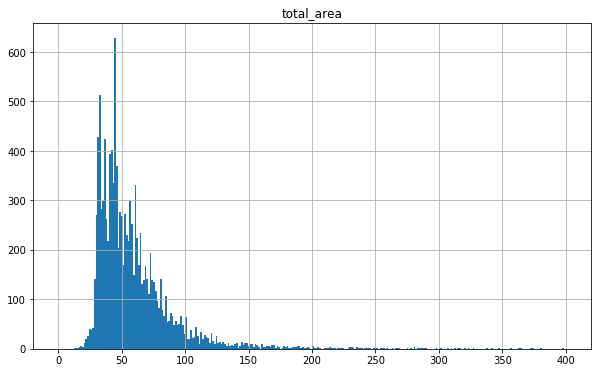

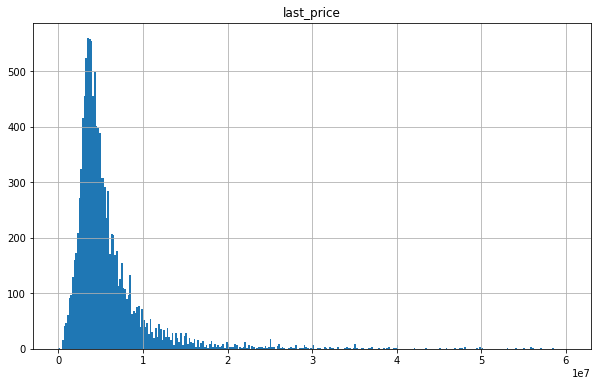

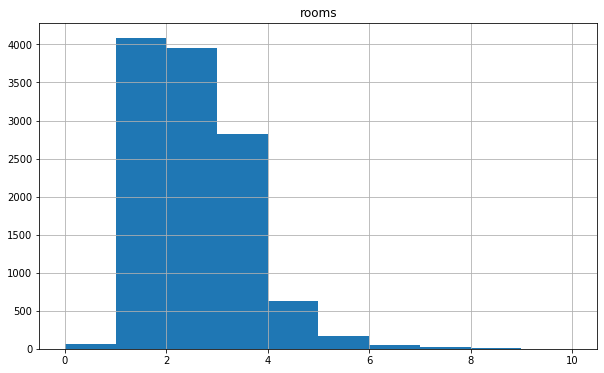

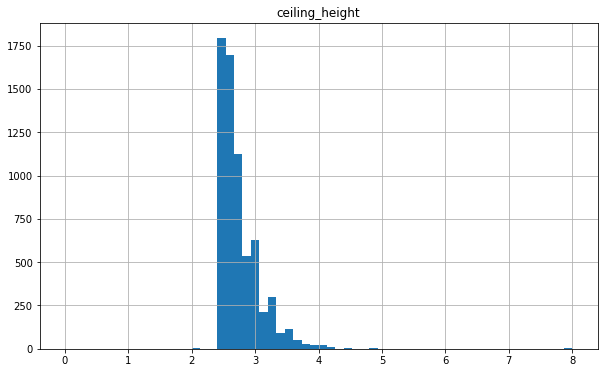

In [15]:
#Площадь, цена, число комнат, высота потолков
print(flats["total_area"].describe())
flats.hist("total_area", bins=300, range = (0,400), figsize=(10,6))
print(flats["last_price"].describe())
flats.hist("last_price", bins=300, range = (0, 60000000), figsize=(10,6))
print(flats["rooms"].describe())
flats.hist("rooms", bins=10, range = (0,10), figsize=(10,6))
print(flats["ceiling_height"].describe())
flats.hist("ceiling_height",bins=60, range = (0,8), figsize=(10,6))

count    11829.000000
mean       192.598783
std        227.764858
min          1.000000
25%         45.000000
50%        107.000000
75%        253.000000
max       1553.000000
Name: days_exposition, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76f1c44690>]],
      dtype=object)

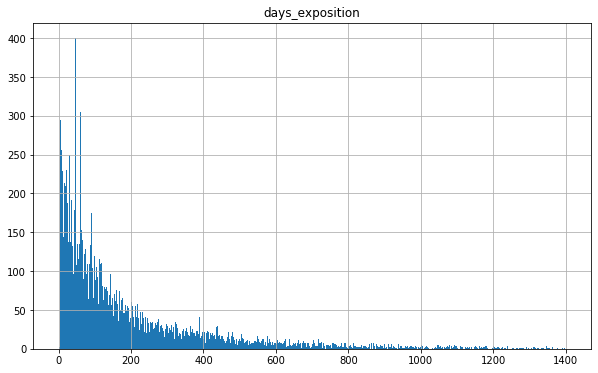

In [16]:
#Время продажи квартиры

print(flats["days_exposition"].describe())
flats.hist("days_exposition", bins = 500, range = (0, 1400), figsize=(10,6))



Быстрая продажа по графику может считаться начиная с одного дня до 10, а долгая после 400 дней. В среднем занимает около 185 дней.

1391      1
1015      1
1484      1
1292      1
1268      1
       ... 
30      102
7       112
4       116
60      187
45      302
Name: days_exposition, Length: 1030, dtype: int64


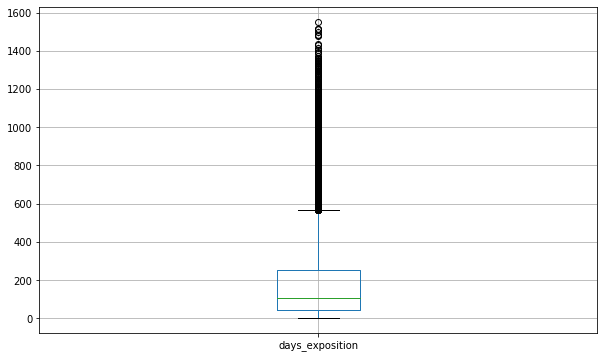

In [17]:
#Убрать редкие и выбивающиеся значения
print(flats["days_exposition"].value_counts().sort_values(ascending = True))
flats.boxplot("days_exposition", figsize=(10,6))
anom = 550
flats = flats.query('0 < days_exposition <= @anom')

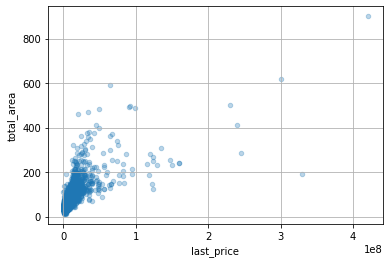

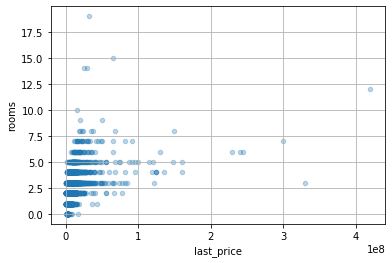

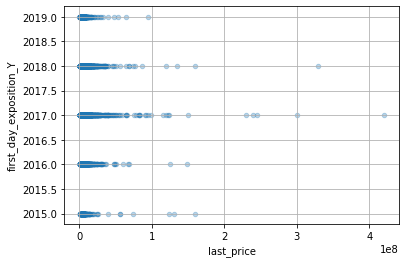

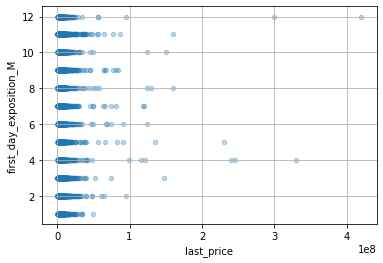

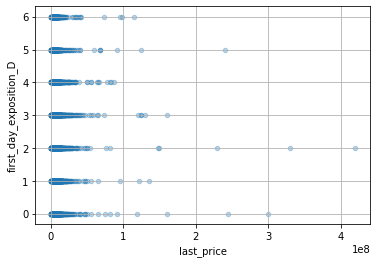

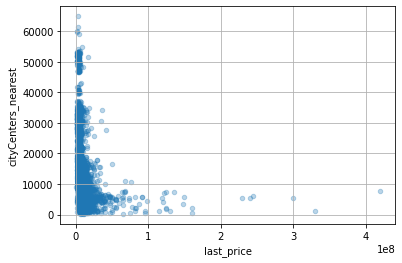

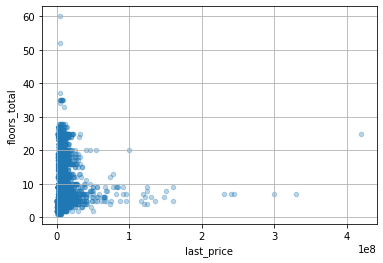

In [18]:
#Анализ стоимости квартиры
y_columns = ['total_area', 'rooms', 'first_day_exposition_Y', 'first_day_exposition_M', 'first_day_exposition_D', 'cityCenters_nearest', 'floors_total']
 
for y in y_columns:
    flats.plot(x='last_price', y=y, kind='scatter', alpha = 0.3, grid=True)
    plt.show()


Изучая данные этих графиков, можно наглядно сделать следующие выводы: Площадь квартиры влияет на цену, чем больше площадь квартиры, тем выше цена. Количество комнат влияет на цену, но уже не так сильно, как площадь. На год цена повлияла, в 2017 году выставляли более дорогие квартиры чем до и после. Как видно из-за экономической ситуации в стране. 

Месяца тоже примерно одинаковы, но в феврале, июне и в октябре цены самые высокие. Цена на день недели тоже влияет, в понедельник и в четверг, выставляют в среднем квартиры дороже. Близость к центру сильно влияет на цену, все самые дорогие квартиры возле центра. Этаж не очень сильно влияет, но с 5 по 10 этаж, цены на квартиры самые высокие.

In [19]:
#10 населённых пунктов
max_pop = flats["locality_name"].value_counts().sort_values(ascending=False)
print(max_pop.head(10))
max_pop_cities = flats.pivot_table(index = "locality_name", values= "price_metre", aggfunc=["mean"])
max_pop_cities.columns = ["price_metre"]
print(max_pop_cities.head(10).sort_values(by= "price_metre", ascending=False))
print(max_pop_cities.tail(10).sort_values(by= "price_metre", ascending=False))

Санкт-Петербург      7409
посёлок Мурино        245
посёлок Шушары        210
Колпино               175
Пушкин                169
Всеволожск            165
посёлок Парголово     138
Гатчина               123
Выборг                123
Петергоф              112
Name: locality_name, dtype: int64
                 price_metre
locality_name               
Зеленогорск    103535.470000
Всеволожск      67558.658970
Гатчина         66982.655854
Выборг          57028.397967
Волосово        39655.191000
Волхов          34804.517407
Высоцк          29629.630000
Ивангород       29535.476364
Каменногорск    25725.645000
Бокситогорск    16041.606250
                                                     price_metre
locality_name                                                   
село Павлово                                        61631.293333
село Русско-Высоцкое                                53203.150000
садовое товарищество Приладожский                   44166.670000
село Копорье                     

Самый дорогой квадратный метр окозался в зеленогорске, а самый дешевый в селе Паша.

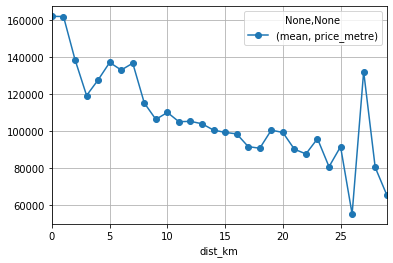

In [20]:
#Квартиры в Санкт-Петербурге
flats = flats.query('locality_name == "Санкт-Петербург"')
flats["dist_km"] = flats["cityCenters_nearest"].round()
flats["dist_km"] = flats["dist_km"] // 1000
dist_km = flats.pivot_table(index = "dist_km", values = "price_metre", aggfunc = ["mean"])
dist_km.plot(style="o-", grid=True)

На графике можно увидеть как сильно падает цена до 3км от центра, но потом она начинает расти до значения 7км, а далее идти только вниз. Этот промежуток и будем считаться центральной зоной.

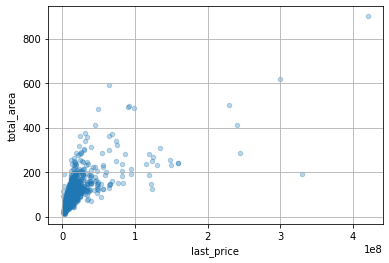

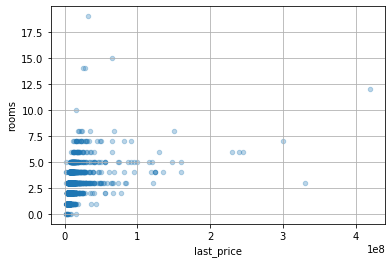

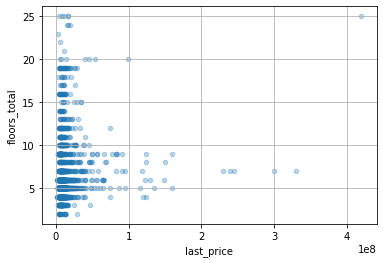

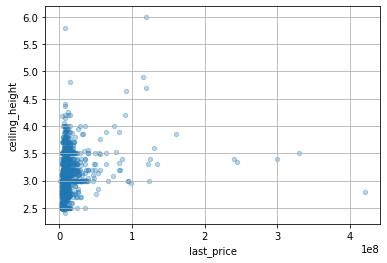

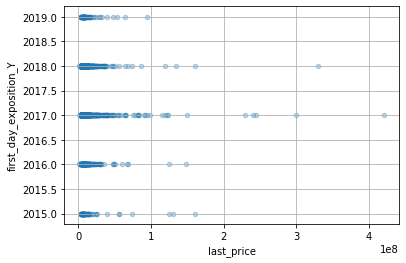

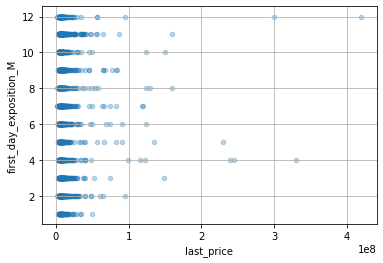

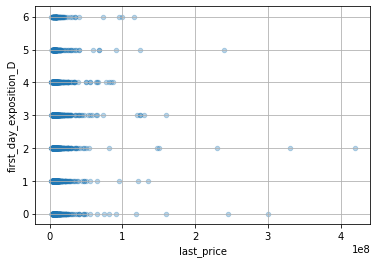

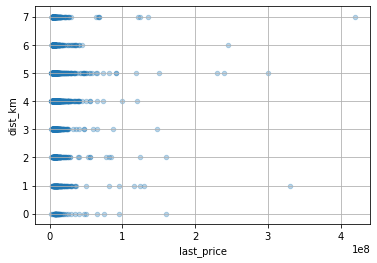

In [21]:
#Квартиры в СПБ

flats_center = flats.query('dist_km < 8')
y_columns = ['total_area', 'rooms', 'floors_total', 'ceiling_height','first_day_exposition_Y',
             'first_day_exposition_M', 'first_day_exposition_D', 'dist_km']
for y in y_columns:
    flats_center.plot(x='last_price', y=y, kind='scatter', alpha = 0.3, grid=True)
    plt.show()

На графике в питере сразу кидается в глаза, то что они отличаются чем в среднем по всему региону. В среднем все примерно одинаково. А вот различие в графиках следующие: Петербуржцы ценят больше шестой и пятый этаж, думаю связано с тем, что в центре здания низкие, а цена их высокое.

# Шаг 5. 

# Общий вывод

В этом иследовании был изучен большой объем данных о квартирах в санкт-петербурге и близ лежавших районов. В данных было обнаружено большое количество пропусков, я устранил оптимальное количество недочетов. Я ориентировался так, чтобы убрать там пропуски которые где можно было заменить не тыкая палцем в небо. Также я оставил некоторые пропуски, так как не было возможности заменить из за отсутсвия корреляции. Вдобавок к всему этих прорусков было много и просто удалить их было бы опрометчиво, потому что это могло повлиять на дальнейшие выводы. 
В общем, я высчитал среднию цену квадратного метра для каждого города, узнал от чего зависит цена в регоине. А также убедился, что в питере характеристики влияющие на цену отличаются чем в среднем по региону. 